In [7]:
!which python

/Users/mdymshits/virtualenv/ir-threat/bin/python


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, BatchNormalization, Dropout
from keras import optimizers

Using TensorFlow backend.


In [40]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline


In [45]:
def mse(Y, YH):
     return np.square(Y - YH).mean()

# Creating data
### Creating 1 batch of of the same ARMA

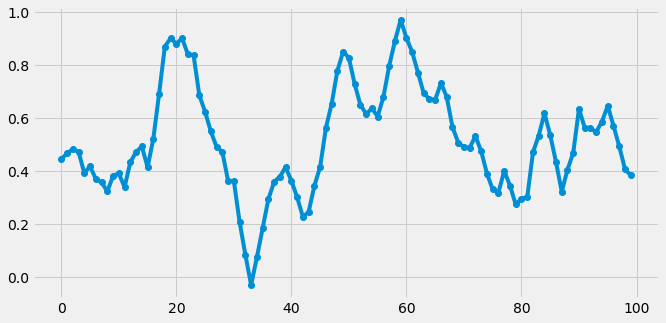

In [37]:



np.random.seed(123)
arparams = np.array([.5, .2])
maparams = np.array([1, 1,])
# arparams = np.array([.75, -.25])
# maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add z

ts = sm.tsa.arma_generate_sample(ar, ma, 100000)
ts = (ts + 10) / 20

plt.figure(figsize=(10,5))
plt.plot(ts[:100], marker='o');
ts_same = ts.reshape((1000, 100))

### Creating ARMA from different intialization

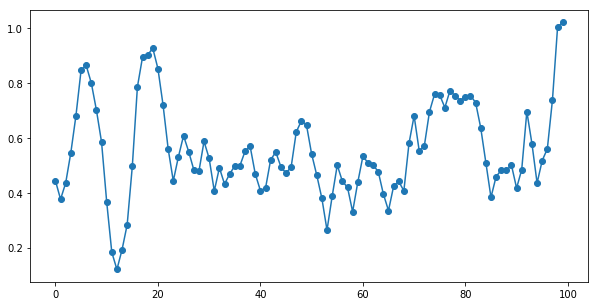

In [11]:

ts = []
np.random.seed(456)
for i in range(1000):

    ar = np.array([.75, -.5])
    ma = np.array([.25, .2])

    ts.append(sm.tsa.arma_generate_sample(ar, ma, 100))
    
ts_diff = np.array(ts)
ts_diff = (ts_diff + 2) / 4
plt.figure(figsize=(10,5))
plt.plot(ts_diff[0,:100], marker='o');

# Modeling
1-D Convolutional Network

In [38]:
def cnn_model(x_train, y_train, batch_size, epochs=100):
    
    
    input_dim = n_steps_for_train
    model = Sequential()
    model.add(Convolution1D(filters=6, kernel_size=4, input_shape=(input_dim ,1)))
    model.add(Flatten())
    model.add(Dense(units=64, kernel_initializer='normal'))
    # model.add(BatchNormalization())
    model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(units=60, actiivation='relu'))
    # model.add(Dense(units=40, activation='relu'))
    model.add(Dense(units=100-input_dim, activation='linear'))


    sgd = optimizers.SGD(lr=0.1)
    model.compile(loss='mean_squared_error',
                  optimizer='sgd',
                  metrics=['mae'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=.3, verbose=2)
    return model, history

```
n_steps_for_train = 60
n_samples = num_of_ts/2

x_train = data_numpy[:num_of_ts/2, :n_steps_for_train].reshape(n_samples, n_steps_for_train, 1) * 2000
y_train = data_numpy[:num_of_ts/2, n_steps_for_train:] * 2000

x_test = data_numpy[num_of_ts/2:, :n_steps_for_train].reshape(n_samples, n_steps_for_train, 1) * 2000
y_test = data_numpy[num_of_ts/2:, n_steps_for_train:] * 2000
```


In [39]:
n_samples = ts_same.shape[0]
n_steps_for_train = 75
x_train_same = ts_same[:n_samples/2, :n_steps_for_train].reshape(n_samples/2, n_steps_for_train, 1)
y_train_same = ts_same[:n_samples/2, n_steps_for_train:]

x_test_same = ts_same[n_samples/2:, :n_steps_for_train].reshape(n_samples/2, n_steps_for_train, 1)
y_test_same = ts_same[n_samples/2:, n_steps_for_train:]

model, history = cnn_model(x_train=x_train_same, y_train=y_train_same, batch_size=4)

Train on 350 samples, validate on 150 samples
Epoch 1/100
 - 0s - loss: 0.1685 - mean_absolute_error: 0.3487 - val_loss: 0.0723 - val_mean_absolute_error: 0.2149
Epoch 2/100
 - 0s - loss: 0.0515 - mean_absolute_error: 0.1802 - val_loss: 0.0389 - val_mean_absolute_error: 0.1579
Epoch 3/100
 - 0s - loss: 0.0362 - mean_absolute_error: 0.1525 - val_loss: 0.0341 - val_mean_absolute_error: 0.1475
Epoch 4/100
 - 0s - loss: 0.0339 - mean_absolute_error: 0.1475 - val_loss: 0.0332 - val_mean_absolute_error: 0.1452
Epoch 5/100
 - 0s - loss: 0.0334 - mean_absolute_error: 0.1464 - val_loss: 0.0329 - val_mean_absolute_error: 0.1446
Epoch 6/100
 - 0s - loss: 0.0331 - mean_absolute_error: 0.1457 - val_loss: 0.0328 - val_mean_absolute_error: 0.1444
Epoch 7/100
 - 0s - loss: 0.0329 - mean_absolute_error: 0.1451 - val_loss: 0.0327 - val_mean_absolute_error: 0.1441
Epoch 8/100
 - 0s - loss: 0.0328 - mean_absolute_error: 0.1448 - val_loss: 0.0325 - val_mean_absolute_error: 0.1436
Epoch 9/100
 - 0s - loss: 

Epoch 71/100
 - 0s - loss: 0.0295 - mean_absolute_error: 0.1376 - val_loss: 0.0302 - val_mean_absolute_error: 0.1385
Epoch 72/100
 - 0s - loss: 0.0295 - mean_absolute_error: 0.1373 - val_loss: 0.0301 - val_mean_absolute_error: 0.1379
Epoch 73/100
 - 0s - loss: 0.0294 - mean_absolute_error: 0.1372 - val_loss: 0.0301 - val_mean_absolute_error: 0.1381
Epoch 74/100
 - 0s - loss: 0.0295 - mean_absolute_error: 0.1372 - val_loss: 0.0300 - val_mean_absolute_error: 0.1379
Epoch 75/100
 - 0s - loss: 0.0294 - mean_absolute_error: 0.1373 - val_loss: 0.0300 - val_mean_absolute_error: 0.1378
Epoch 76/100
 - 0s - loss: 0.0294 - mean_absolute_error: 0.1371 - val_loss: 0.0300 - val_mean_absolute_error: 0.1377
Epoch 77/100
 - 0s - loss: 0.0294 - mean_absolute_error: 0.1373 - val_loss: 0.0300 - val_mean_absolute_error: 0.1379
Epoch 78/100
 - 0s - loss: 0.0294 - mean_absolute_error: 0.1371 - val_loss: 0.0299 - val_mean_absolute_error: 0.1377
Epoch 79/100
 - 0s - loss: 0.0294 - mean_absolute_error: 0.1371 

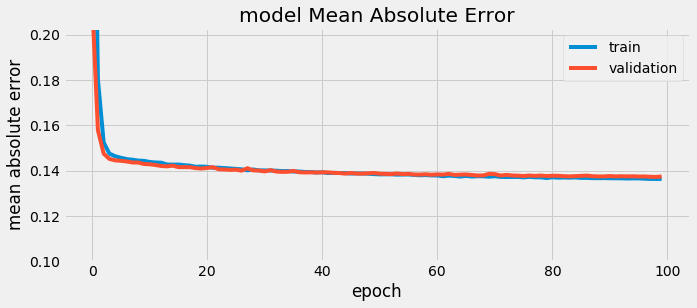

In [41]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 4))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
# plt.xlim(1,10)
plt.ylim(0.1, .203)
plt.title('model Mean Absolute Error')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show();

```
y_pred_train = model.predict(x_train)

random_indexes = range(data.shape[1]/2)
random.shuffle(random_indexes)

for i in random_indexes[:5]:
    plt.figure()
    plt.plot(range(60), x_train[i], marker='o', markersize=3, label='input')
    plt.plot(range(60, 120), y_train[i], label='true')
    plt.plot(range(60, 120), y_pred_train[i], c='m', label='prediction')
    plt.title('train')
    plt.legend()
```

In [19]:
x_train_same[i].shape


(75, 1)

'final error is 0.0287'

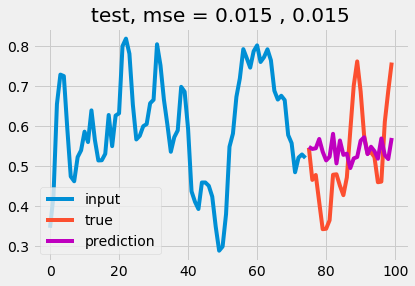

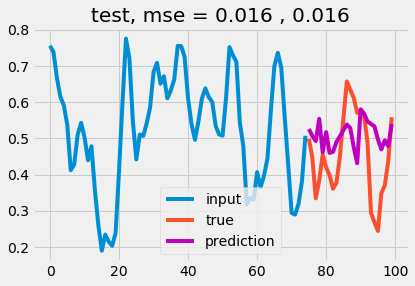

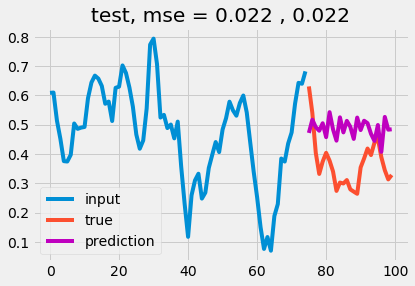

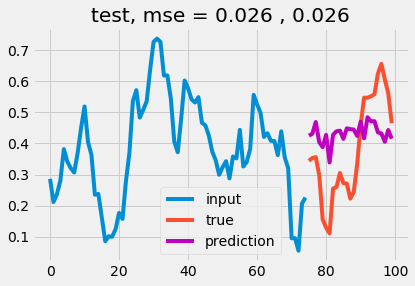

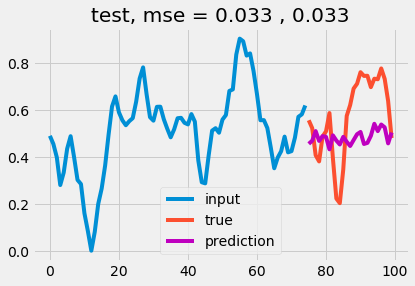

In [72]:
y_pred_test = model.predict(x_test_same)

for i in range(5):
    plt.figure()
    plt.plot(range(75), x_test_same[i], label='input')
    plt.plot(range(75, 100), y_test_same[i], label='true')
    plt.plot(range(75, 100), y_pred_test[i], c='m', label='prediction')
    title = 'test, mse = {:.3f} , {:.3f}'.format(mean_squared_error(y_pred_test[i], y_test_same[i]),
                                             mse(y_pred_test[i], y_test_same[i])
                                           )
    
    plt.title(title)
    plt.legend()
'final error is {:.4f}'.format(mse(y_pred_test, y_test_same))

## Comparing with Regular ARIMA


In [33]:
ts_same.shape

(1000, 100)

In [67]:
y_test_same.shape

(500, 25)

In [73]:
y_pred_test = model.predict(x_test_same)
mse_parts = []
for i in range(100):
    try:
        arma_res = sm.tsa.ARMA(x_test_same[i], order=(2,2)).fit()
        preds, stderr, ci = arma_res.forecast(25)
        mse_current = mse(preds, y_test_same[i])
        mse_parts.append(mse_current)

    except Exception:
        pass
'final error is {:.4f}'.format(np.mean(mse_parts))

/Users/mdymshits/virtualenv/ir-threat/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/mdymshits/virtualenv/ir-threat/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/mdymshits/virtualenv/ir-threat/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


'final error is 0.0294'

/Users/mdymshits/virtualenv/ir-threat/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


'final error is 0.0306'

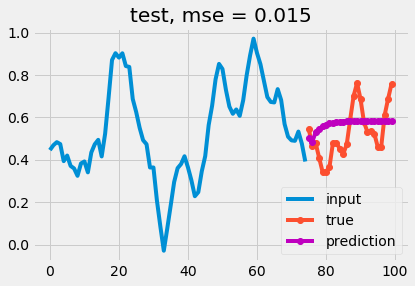

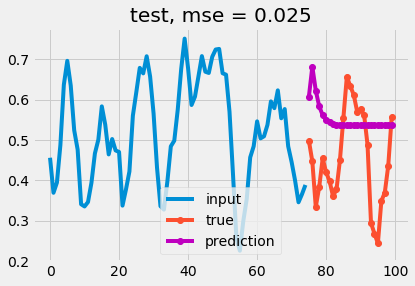

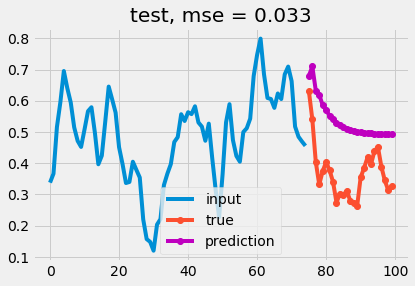

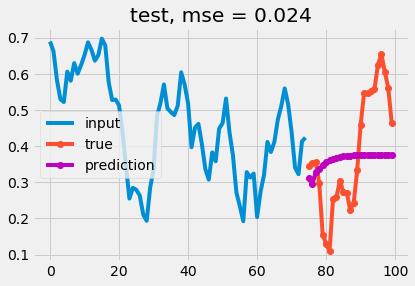

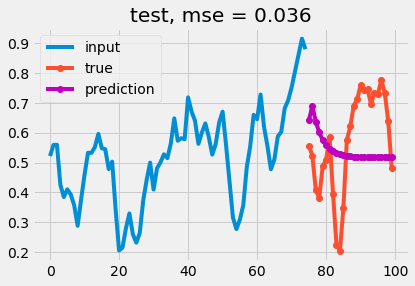

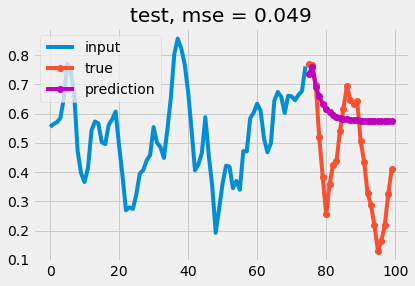

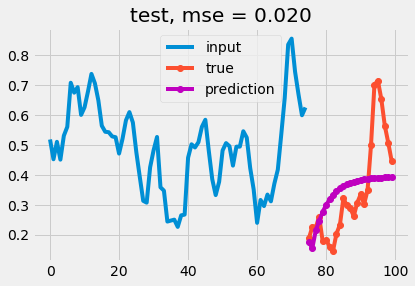

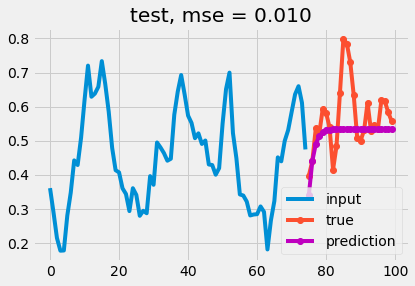

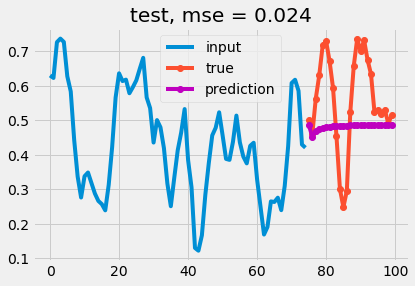

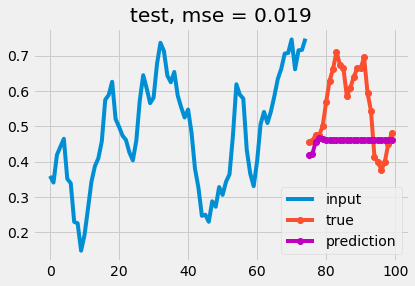

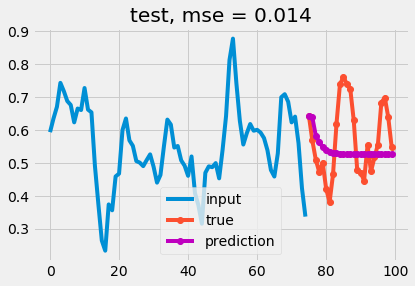

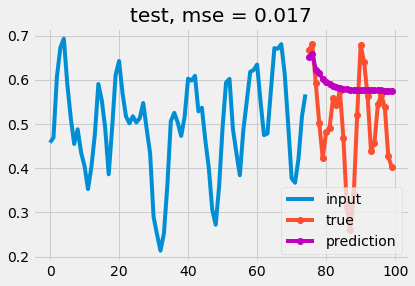

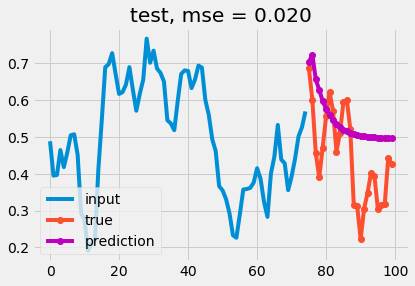

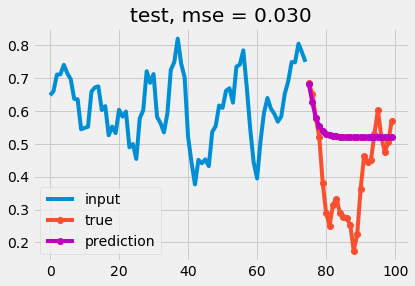

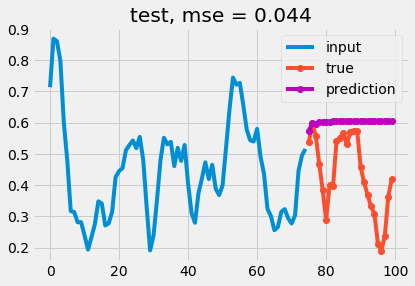

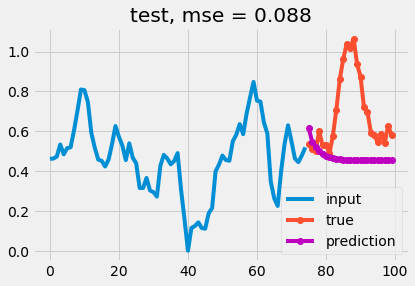

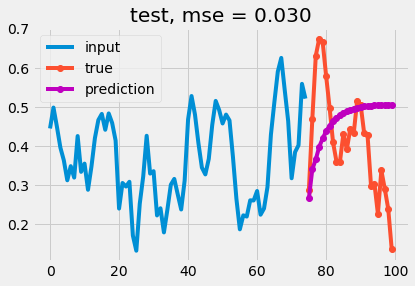

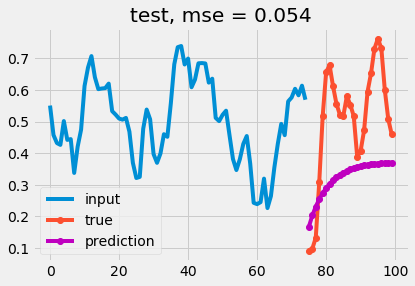

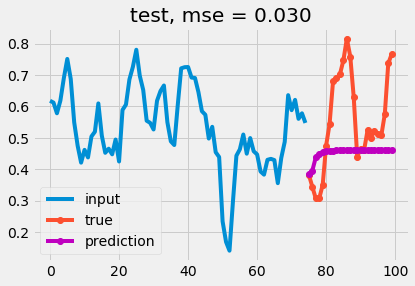

In [74]:
y_pred_test = model.predict(x_test_same)
mse_parts = []
for i in range(20):
    try:
        plt.figure()
        arma_res = sm.tsa.ARMA(x_test_same[i], order=(2,2)).fit()
        preds, stderr, ci = arma_res.forecast(25)
        plt.plot(range(75), x_train_same[i], label='input')
        plt.plot(range(75, 100), y_test_same[i], label='true', marker='o')
        plt.plot(range(75, 100), preds, c='m', label='prediction', marker='o')
        mse_current = mse(preds, y_test_same[i])
        title = 'test, mse = {:.3f}'.format(mse_current)
        plt.title(title)
    
        plt.legend()
        mse_parts.append(mse_current)

    except Exception:
        pass
'final error is {:.4f}'.format(np.mean(mse_parts))